<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Dhiya' Ulhaq Ulayya

NIM   : 2341720021

Kelas : TI - 3A

Modul : 7 - Filter Spasial Low Pass Filter, High Pass Filter, Point
Detection, Line Detection, Edge Detection

# **Praktikum**

**2. Berikut merupakan langkah-langkah yang dilakukan:**

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Mounted at /content/drive


c. Buatlah fungsi konvolusi.

In [2]:
def convolution2d(image, kernel, stride, padding):
    """
    Fungsi konvolusi 2D tanpa library OpenCV
    Parameters:
    - image: citra input (grayscale)
    - kernel: matriks kernel untuk konvolusi
    - stride: besarnya pergeseran
    - padding: jumlah padding yang ditambahkan
    """

    # Dapatkan dimensi image dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung dimensi output
    output_height = (image_height + 2 * padding - kernel_height) // stride + 1
    output_width = (image_width + 2 * padding - kernel_width) // stride + 1

    # Buat output array
    output = np.zeros((output_height, output_width))

    # Tambahkan padding ke image
    if padding > 0:
        image_padded = np.pad(image, padding, mode='constant')
    else:
        image_padded = image

    # Proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Hitung posisi window
            y_start = y * stride
            y_end = y_start + kernel_height
            x_start = x * stride
            x_end = x_start + kernel_width

            # Ekstrak region dari image
            region = image_padded[y_start:y_end, x_start:x_end]

            # Lakukan konvolusi
            output[y, x] = np.sum(region * kernel)

    return output

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

Citra berhasil dimuat
Citra Asli (Grayscale):


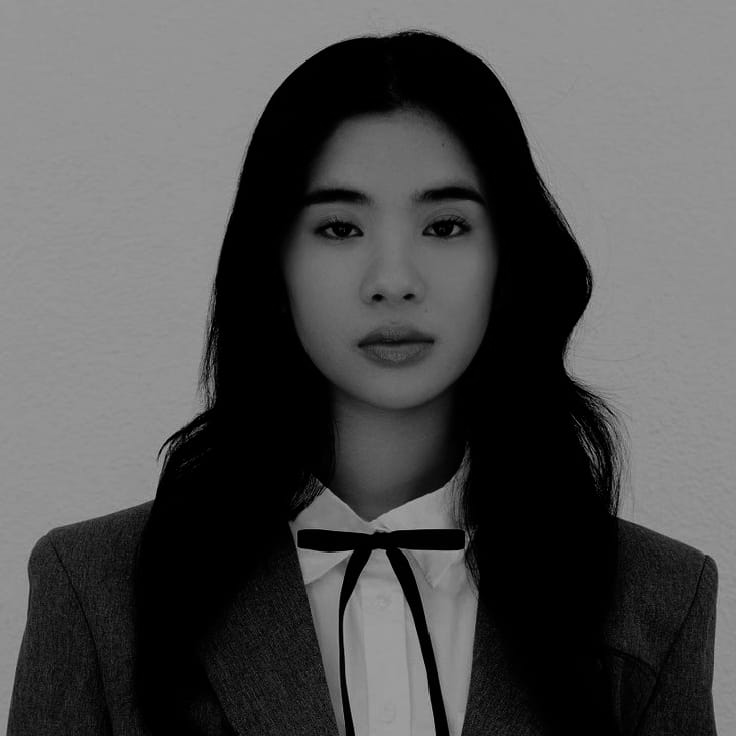

Dimensi citra: (736, 736)


In [3]:
# Load citra (ganti path sesuai lokasi file Anda)
img = cv.imread('/content/drive/MyDrive/Image PCVK/female.jpeg')

# Jika file tidak ditemukan, gunakan contoh alternatif
if img is None:
    # Buat citra contoh
    img = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
    print("Menggunakan citra contoh karena file tidak ditemukan")
else:
    print("Citra berhasil dimuat")

# Ubah ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Tampilkan citra asli
print("Citra Asli (Grayscale):")
cv2_imshow(img_gray)
print(f"Dimensi citra: {img_gray.shape}")

e. Tentukan kernel yang akan digunakan

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

**3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter**

Hasil Sharpening Filter:


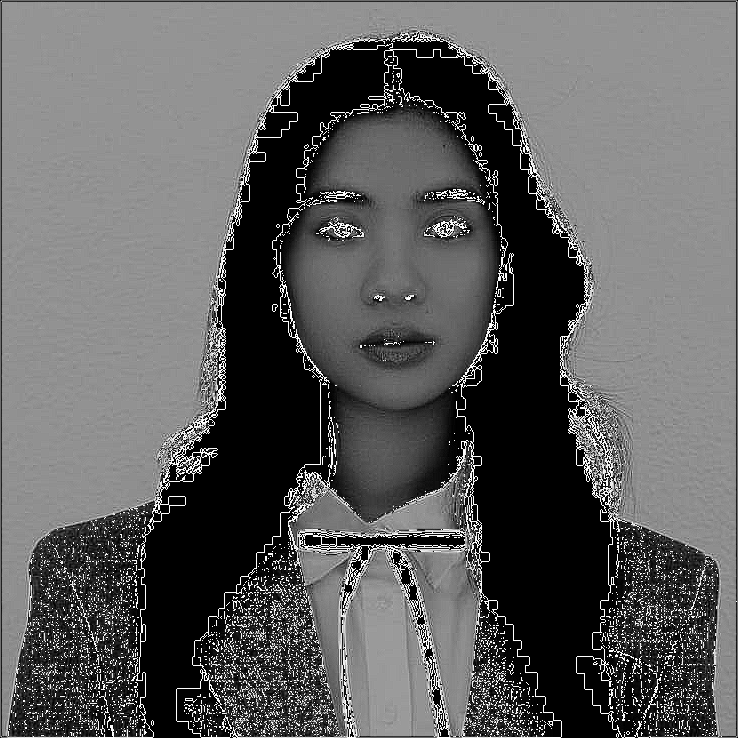

In [6]:
# Kernel sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Terapkan konvolusi
result_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)

# Tampilkan hasil
print("Hasil Sharpening Filter:")
cv2_imshow(result_sharpen.astype(np.uint8))

Hasil Average Filter:


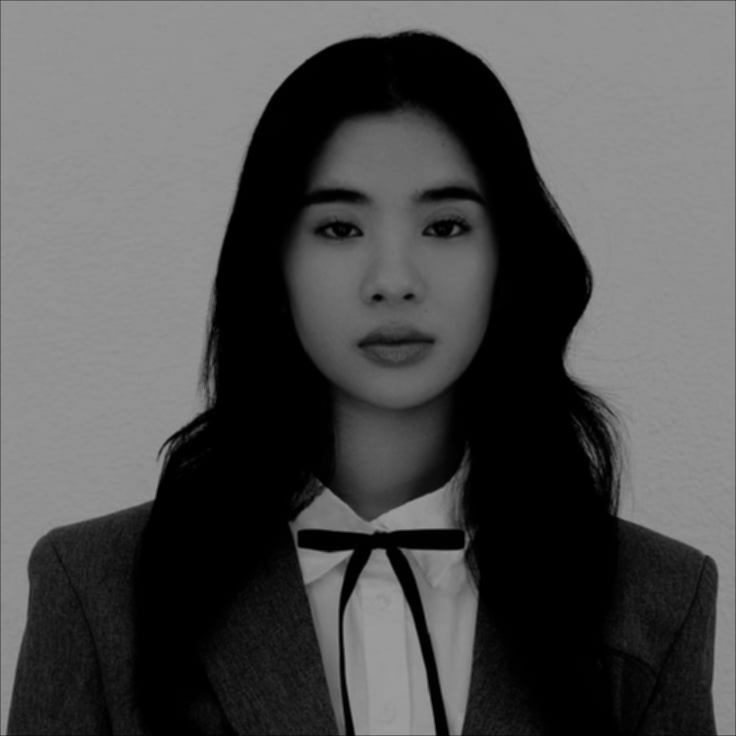

In [5]:
# Kernel average filter 3x3
kernel_average = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]]) / 9

result_average = convolution2d(img_gray, kernel_average, 1, 1)
print("Hasil Average Filter:")
cv2_imshow(result_average.astype(np.uint8))

Hasil Low Pass Filter:


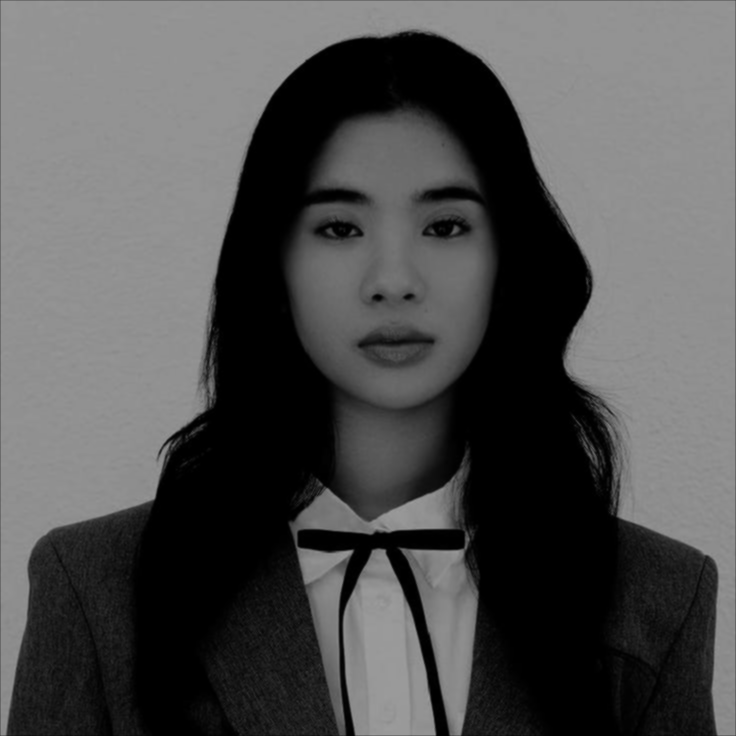

In [7]:
# Kernel low pass filter
kernel_lowpass = np.array([[1, 1, 1],
                           [1, 4, 1],
                           [1, 1, 1]]) / 12

result_lowpass = convolution2d(img_gray, kernel_lowpass, 1, 1)
print("Hasil Low Pass Filter:")
cv2_imshow(result_lowpass.astype(np.uint8))

Hasil High Pass Filter:


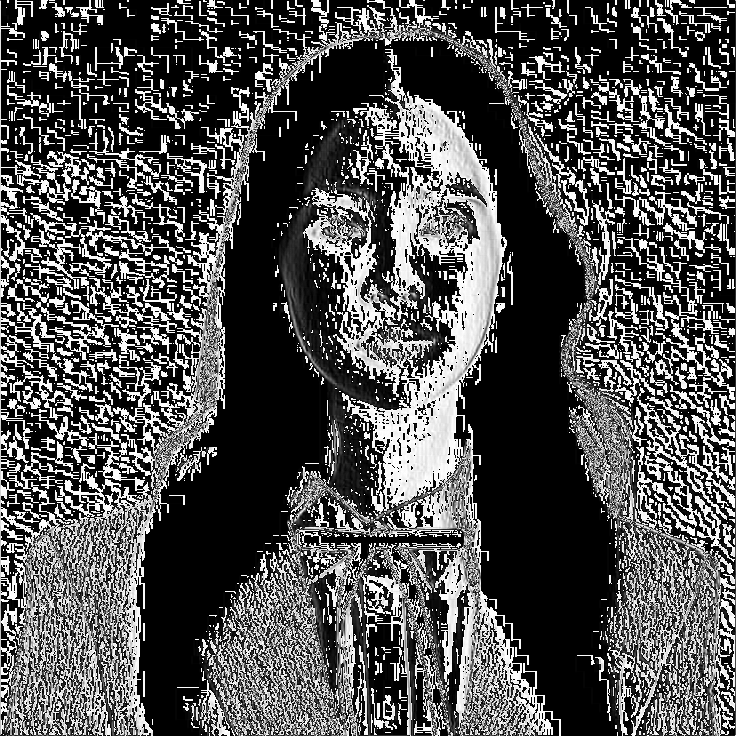

In [8]:
# Kernel high pass filter
kernel_highpass = np.array([[-1, 0, 1],
                            [-1, 0, 3],
                            [-3, 0, 1]])

result_highpass = convolution2d(img_gray, kernel_highpass, 1, 1)
print("Hasil High Pass Filter:")
cv2_imshow(result_highpass.astype(np.uint8))

Hasil Emboss Filter:


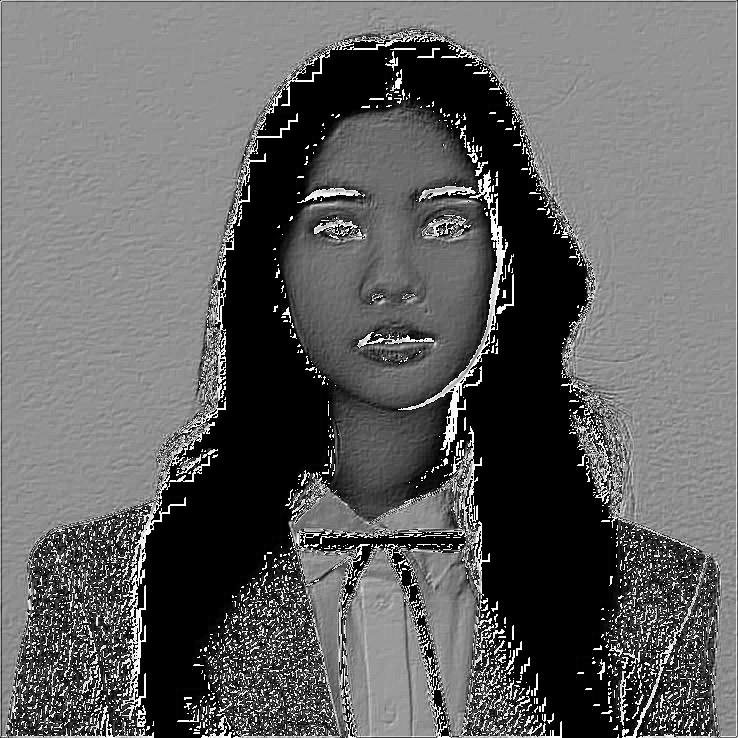

In [16]:
# Kernel emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

result_emboss = convolution2d(img_gray, kernel_emboss, 1, 2)
print("Hasil Emboss Filter:")
cv2_imshow(result_emboss.astype(np.uint8))

Hasil Left Sobel Edge Detection:


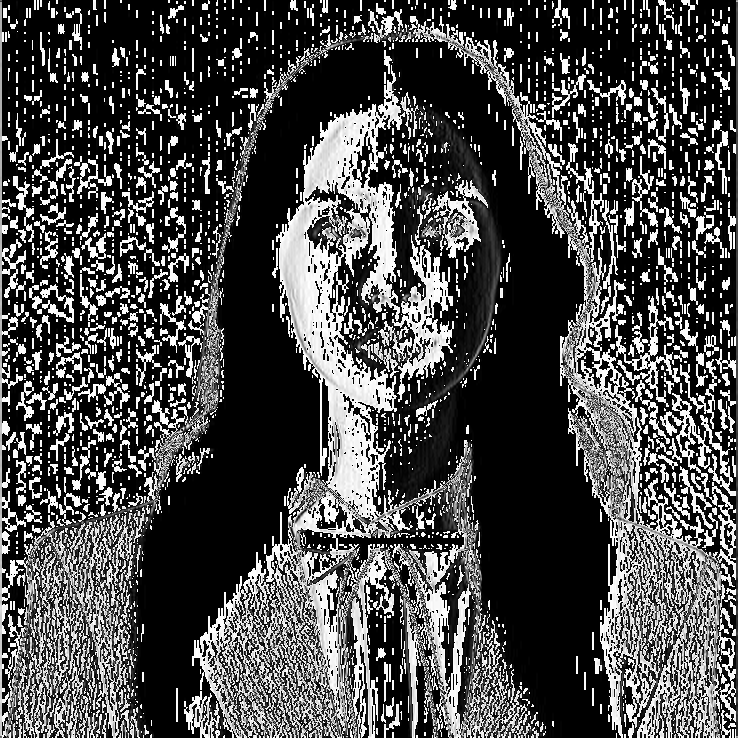

In [17]:
# Left Sobel Edge Detection
kernel_sobel_left = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

result_sobel_left = convolution2d(img_gray, kernel_sobel_left, 1, 2)
print("Hasil Left Sobel Edge Detection:")
cv2_imshow(result_sobel_left.astype(np.uint8))

Hasil Canny Edge Detection (Approximation):


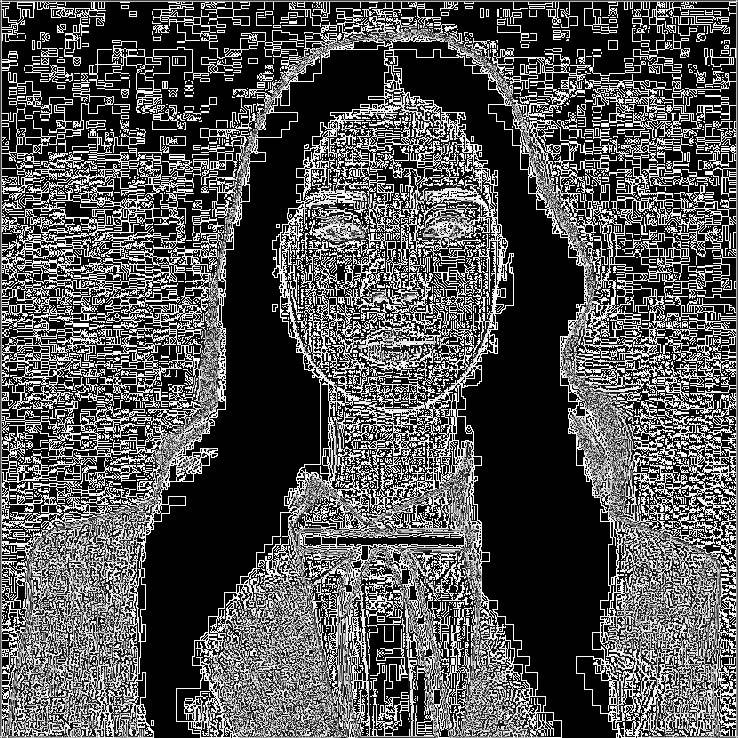

In [19]:
# Canny Edge Detection (Approximation)
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])

result_canny = convolution2d(img_gray, kernel_canny, 1, 2)
print("Hasil Canny Edge Detection (Approximation):")
cv2_imshow(result_canny.astype(np.uint8))

Hasil Prewitt Edge Detection:


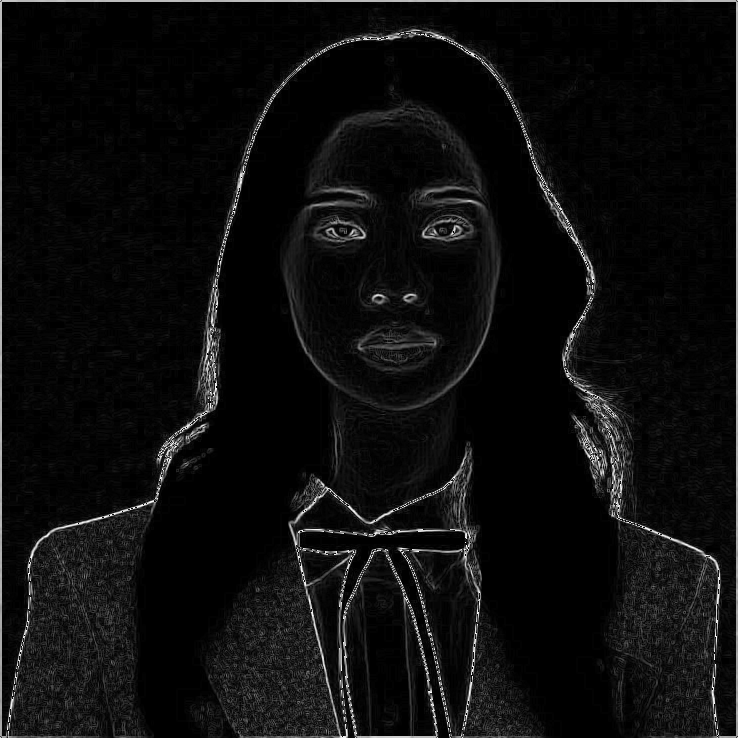

In [21]:
# Prewitt Edge Detection
# Prewitt horizontal
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

# Prewitt vertical
kernel_prewitt_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

result_prewitt_x = convolution2d(img_gray, kernel_prewitt_x, 1, 2)
result_prewitt_y = convolution2d(img_gray, kernel_prewitt_y, 1, 2)
result_prewitt = np.sqrt(result_prewitt_x**2 + result_prewitt_y**2)

print("Hasil Prewitt Edge Detection:")
cv2_imshow(result_prewitt.astype(np.uint8))

Hasil Gaussian Blur 5x5:


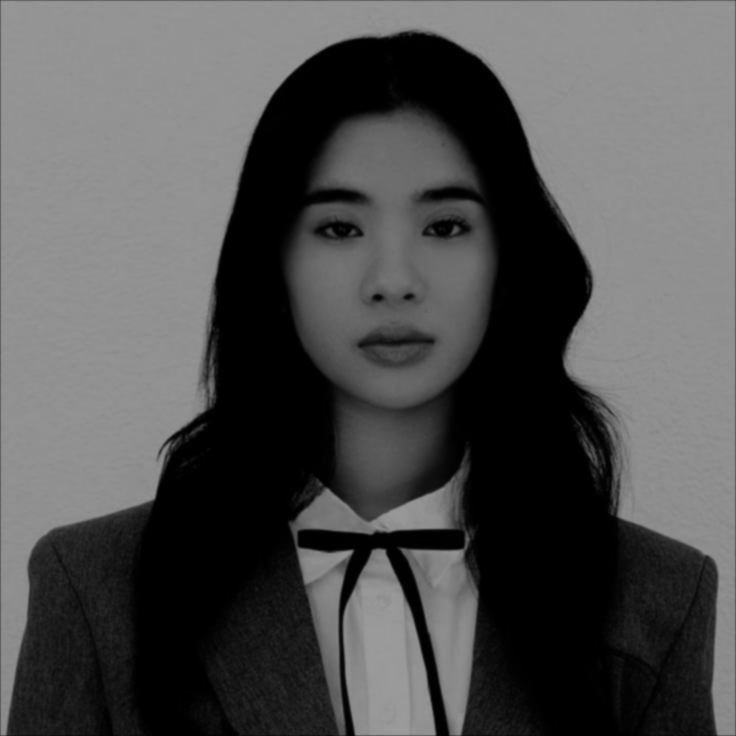

In [13]:
# 5x5 Gaussian Blur
def create_gaussian_kernel(size, sigma=1.0):
    """Membuat kernel Gaussian"""
    kernel = cv.getGaussianKernel(size, sigma)
    kernel_2d = kernel @ kernel.T
    return kernel_2d

# Kernel Gaussian 5x5
kernel_gaussian_5x5 = create_gaussian_kernel(5, 1.0)
result_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, 1, 2)
print("Hasil Gaussian Blur 5x5:")
cv2_imshow(result_gaussian_5x5.astype(np.uint8))

Hasil Gaussian Blur 21x21:


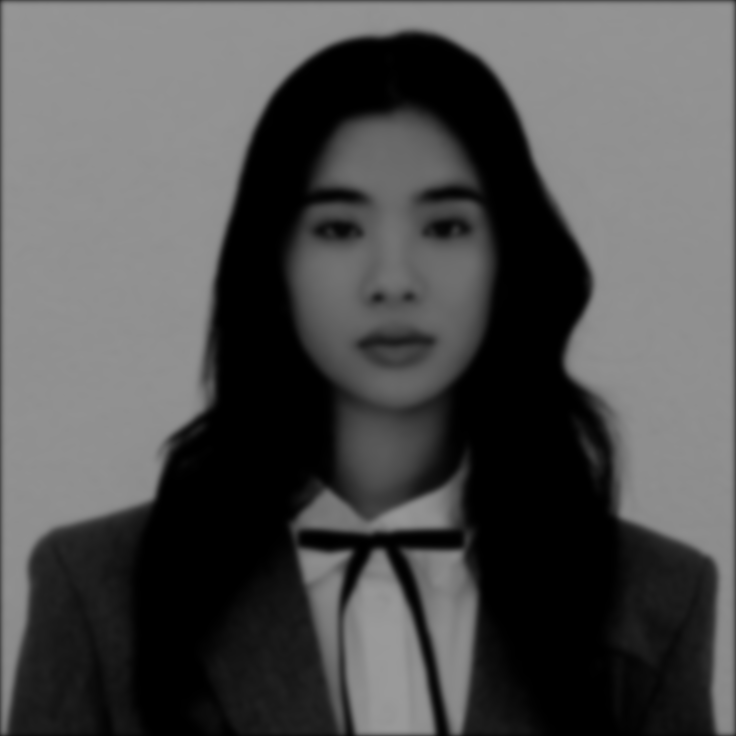

In [14]:
# 21x21 Gaussian Blur
# Kernel Gaussian 21x21
kernel_gaussian_21x21 = create_gaussian_kernel(21, 3.0)
result_gaussian_21x21 = convolution2d(img_gray, kernel_gaussian_21x21, 1, 10)
print("Hasil Gaussian Blur 21x21:")
cv2_imshow(result_gaussian_21x21.astype(np.uint8))

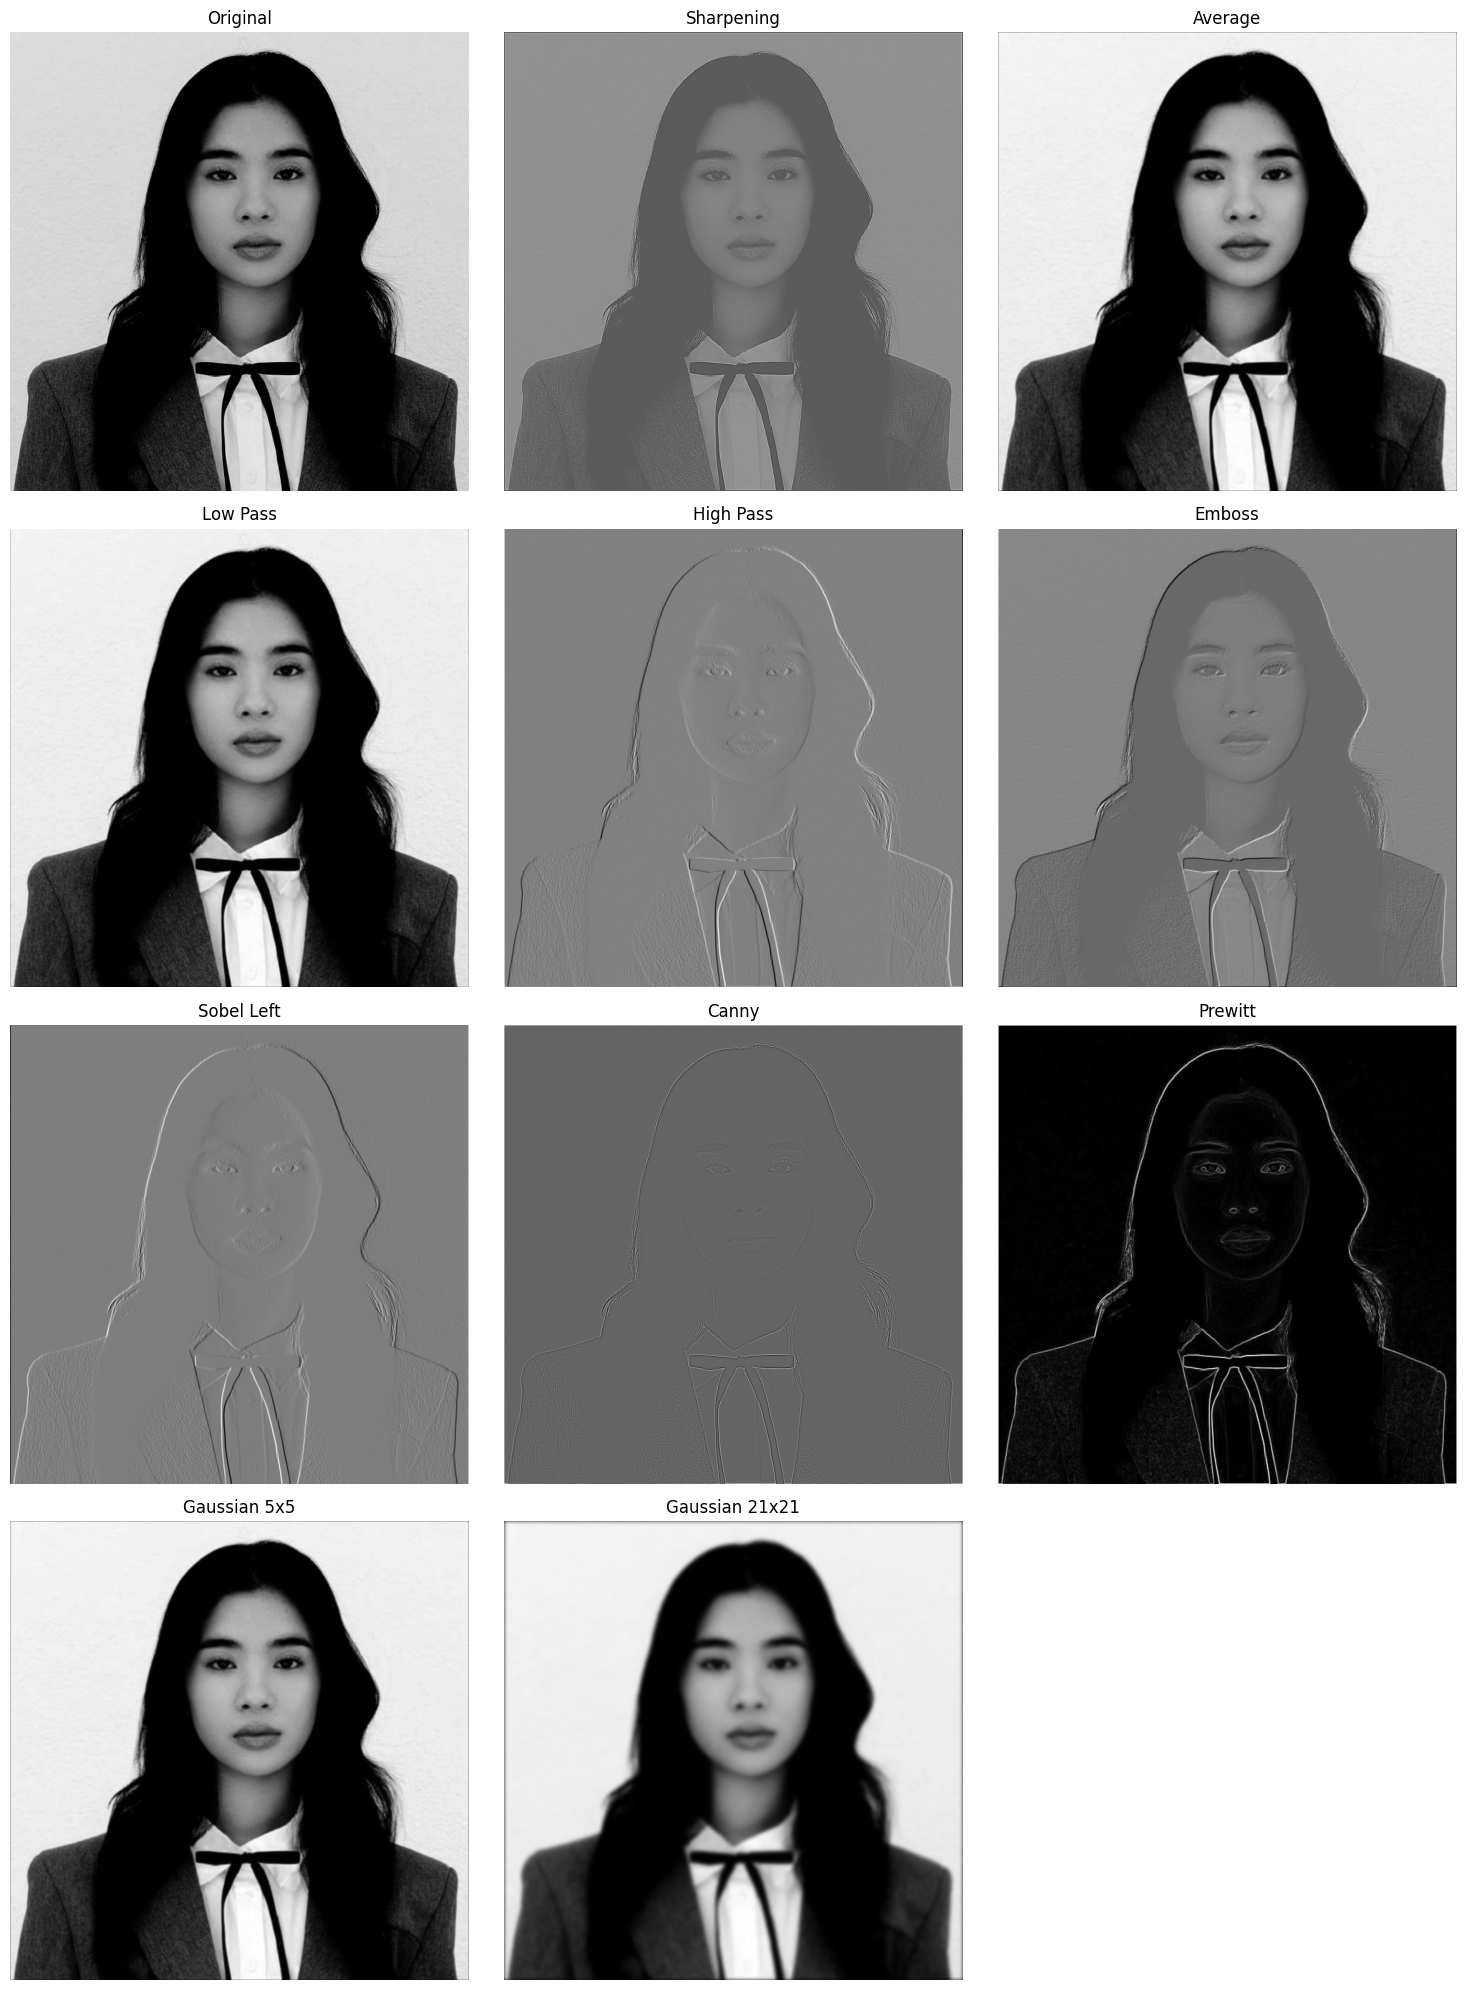

In [15]:
# Buat visualisasi perbandingan
filters = {
    'Original': img_gray,
    'Sharpening': result_sharpen,
    'Average': result_average,
    'Low Pass': result_lowpass,
    'High Pass': result_highpass,
    'Emboss': result_emboss,
    'Sobel Left': result_sobel_left,
    'Canny': result_canny,
    'Prewitt': result_prewitt,
    'Gaussian 5x5': result_gaussian_5x5,
    'Gaussian 21x21': result_gaussian_21x21
}

# Plot semua hasil
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.ravel()

for idx, (name, result) in enumerate(filters.items()):
    axes[idx].imshow(result, cmap='gray')
    axes[idx].set_title(name)
    axes[idx].axis('off')

# Sembunyikan subplot yang tidak terpakai
for idx in range(len(filters), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

**Penjelasan Hasil:**

- Sharpening: Mempertajam citra dengan meningkatkan kontras pada edge

- Average Filter: Mengaburkan citra dengan merata-ratakan nilai piksel tetangga

- Low Pass Filter: Melewatkan frekuensi rendah (area halus), mengurangi noise

- High Pass Filter: Melewatkan frekuensi tinggi (edge), menonjolkan detail

- Emboss: Menghasilkan efek timbul/3D

- Edge Detection: Mendeteksi tepi objek dalam citra

- Gaussian Blur: Pengaburan dengan distribusi Gaussian yang lebih natural